<a href="https://colab.research.google.com/github/chongmong/python/blob/main/%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EC%8B%A4%EB%AC%B4_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#아파트 매매 실거래 현황

In [ ]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 데이터 수집
import urllib.request
from bs4 import BeautifulSoup

data = 202212
gu_code = 41281

service_key = '8ii22PTHYjv2akWxcIrZA7zcHXFyTrWq153f7OQcBH%2BKEa6hTsH5Kq5Tx2BpmBwHQN%2BUnYqVpfcG6%2ByWkMHfSQ%3D%3D'

url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey={service_key}&LAWD_CD={gu_code}&DEAL_YMD={data}'

res = urllib.request.urlopen(url)
zero = BeautifulSoup(res, 'lxml-xml')
fm = zero.find_all('item')

#print(fm)


In [ ]:
# 데이터 정리
sepertay = []  #1

for i in range(len(fm)):  
    price = fm[i].거래금액.string.strip()  
    rent_fee = fm[i].거래유형.string.strip()
    built_yr = fm[i].건축년도.string.strip()
    nuem_yr = fm[i].년.string.strip()
    dong_name = fm[i].법정동.string.strip()
    apt_name = fm[i].아파트.string.strip()
    month_tm = fm[i].월.string.strip()
    day_tm = fm[i].일.string.strip()
    size = fm[i].전용면적.string.strip()
    spot = fm[i].중개사소재지.string.strip()
    large = fm[i].지번.string.strip()
    gu_code = fm[i].지역코드.string.strip()
    floor_code = fm[i].층.string.strip()
    
    data = [price, rent_fee, built_yr, dong_name, apt_name, size, spot, gu_code]  
    sepertay.append(data)  

#print(sepertay)

In [ ]:
# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame(sepertay, columns=['price', 'rent_fee', 'built_yr', 'dong_name', 'apt_name',
                                  'size', 'spot', 'gu_code'])

df

,price,rent_fee,built_yr,dong_name,apt_name,size,spot,gu_code
0,"22,000",중개거래,2003,주교동,(608-3),58.46,경기 고양덕양구,41281
1,"11,000",직거래,1985,주교동,우진(569-9),55.8,,41281
2,"48,000",직거래,2022,주교동,경원아인스타워,74.62,,41281
3,"28,500",중개거래,1999,주교동,서초,84.96,경기 고양덕양구,41281
4,"26,000",중개거래,2017,주교동,스카이팰리스,69.93,경기 고양덕양구,41281
...,...,...,...,...,...,...,...,...
64,"100,000",중개거래,2022,덕은동,DMC디에트르한강,116.6286,경기 고양덕양구,41281
65,"70,000",중개거래,2022,덕은동,DMC한강에일린의뜰,106.2136,경기 고양덕양구,41281
66,"83,000",중개거래,2022,덕은동,DMC자이더리버,84.9948,경기 고양덕양구,41281
67,"70,750",중개거래,2019,향동동,DMC호반베르디움더포레3단지,84.8984,경기 고양덕양구,41281


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      69 non-null     object
 1   rent_fee   69 non-null     object
 2   built_yr   69 non-null     object
 3   dong_name  69 non-null     object
 4   apt_name   69 non-null     object
 5   size       69 non-null     object
 6   spot       69 non-null     object
 7   gu_code    69 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


In [ ]:
# 데이터 전처리
df['price'] = df['price'].str.replace(',', '').astype(int)
df['built_yr'] = df['built_yr'].astype(int)
df['gu_code'] = df['gu_code'].astype(int)
df['size'] = df['size'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      69 non-null     int64  
 1   rent_fee   69 non-null     object 
 2   built_yr   69 non-null     int64  
 3   dong_name  69 non-null     object 
 4   apt_name   69 non-null     object 
 5   size       69 non-null     float64
 6   spot       69 non-null     object 
 7   gu_code    69 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.4+ KB


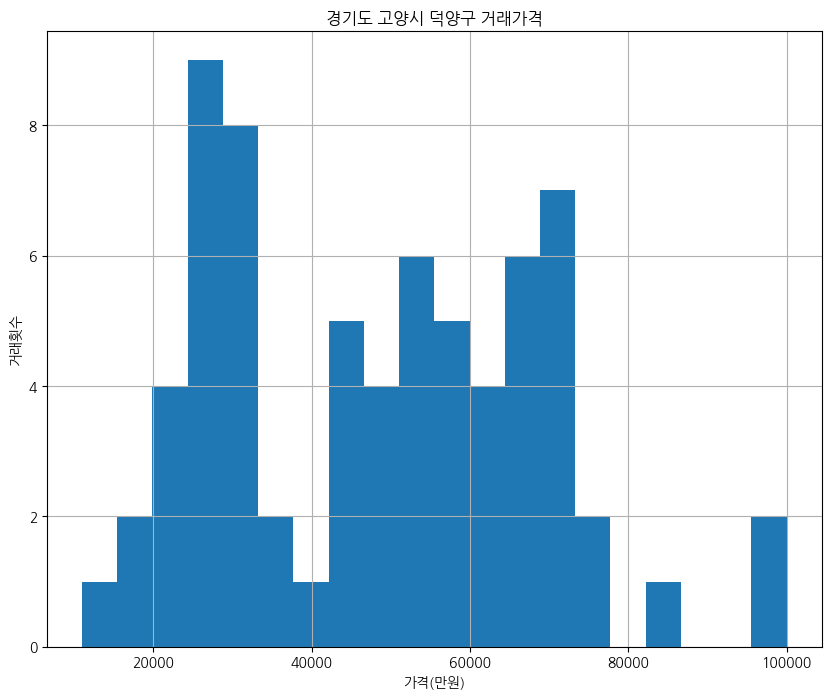

In [ ]:
# 거래금액 히스토그램 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,8))
plt.hist(df['price'], bins=20)
plt.title('경기도 고양시 덕양구 거래가격')
plt.xlabel('가격(만원)')
plt.ylabel('거래횟수')
plt.grid()
plt.show()

In [ ]:
# 거래금액 수치 데이터
df["price"].describe()

count        69.000000
mean      48338.405797
std       20235.692376
min       11000.000000
25%       29900.000000
50%       50000.000000
75%       66000.000000
max      100000.000000
Name: price, dtype: float64

In [ ]:
df
# 파일로 저장
df.to_excel("D:\B\반\\output.xlsx")

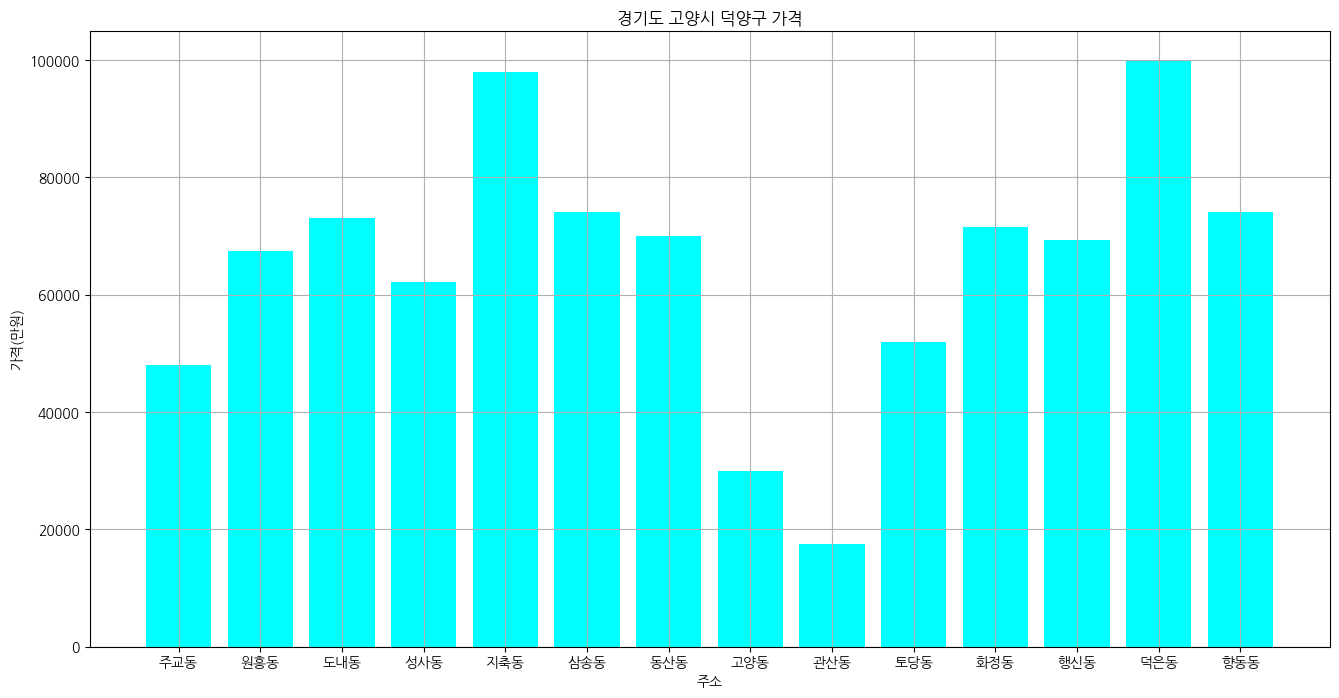

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.rcParams['font.family'] = 'NanumGothic'

# Excel 파일 읽기
df = pd.read_excel('/content/D:\B\반\output.xlsx')  # 파일 경로에는 실제 파일의 경로를 입력하세요

# 세로로 나타낼 숫자 데이터
numbers = df['price'].tolist()  # 숫자열에는 사용자가 원하는 열의 이름을 입력하세요

# 가로로 나타낼 문자 데이터
labels = df['dong_name'].tolist()  # 문자열에는 사용자가 원하는 열의 이름을 입력하세요

# 막대 그래프 생성
plt.bar(labels, numbers, color='aqua')

# 그래프에 제목 추가
plt.title('경기도 고양시 덕양구 가격')

# x축과 y축 레이블 추가
plt.xlabel('주소')
plt.ylabel('가격(만원)')

# 그래프 표시
plt.grid()
plt.show()


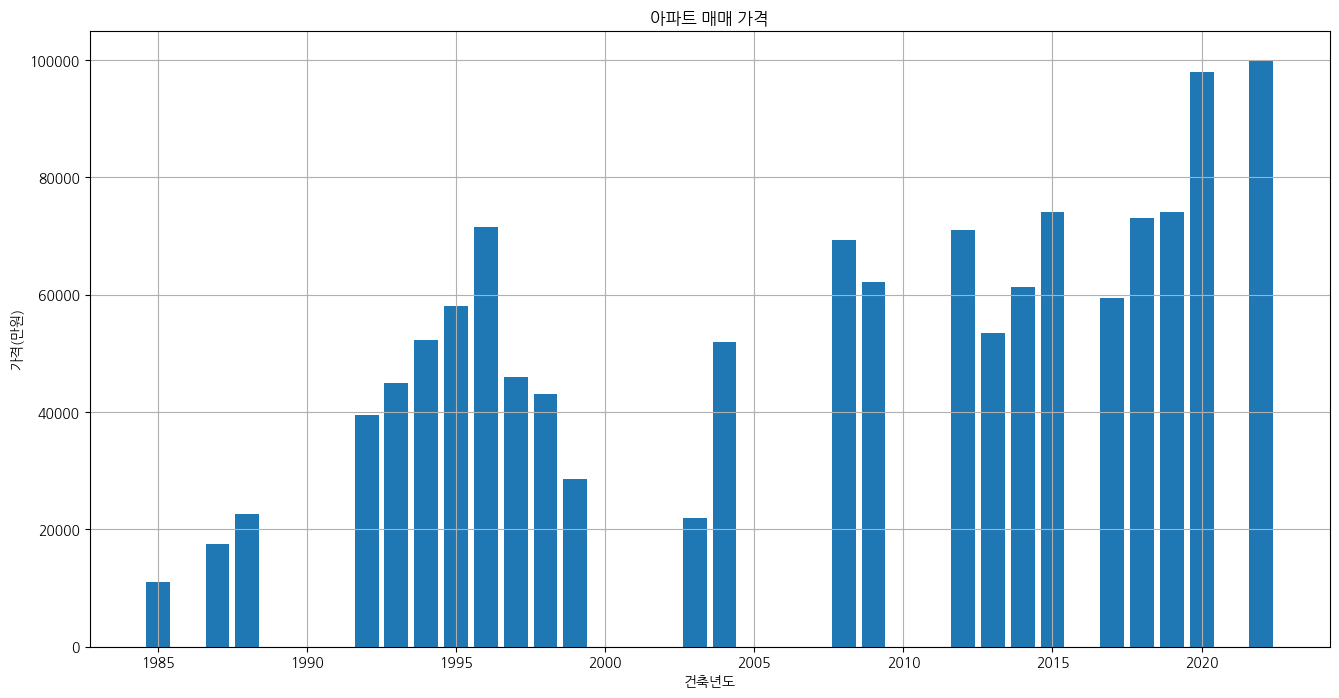

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.rcParams['font.family'] = 'NanumGothic'

# Excel 파일 읽기
df = pd.read_excel('/content/D:\B\반\output.xlsx')  # 파일 경로에는 실제 파일의 경로를 입력하세요

# 세로로 나타낼 숫자 데이터
numbers = df['price'].tolist()  # 숫자열에는 사용자가 원하는 열의 이름을 입력하세요

# 가로로 나타낼 문자 데이터
labels = df['built_yr'].tolist()  # 문자열에는 사용자가 원하는 열의 이름을 입력하세요

# 막대 그래프 생성
plt.bar(labels, numbers)

# 그래프에 제목 추가
plt.title('아파트 매매 가격')

# x축과 y축 레이블 추가
plt.xlabel('건축년도')
plt.ylabel('가격(만원)')

# 그래프 표시
plt.grid()
plt.show()
